# EDA & Data Visualization de l’évolution de l’émission de CO2 par pays et par habitant de 1990 à 2019



In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# importer fichier csv
co2_df = pd.read_csv('/Users/jl/Downloads/CO2_emission.csv')              

# imprimer le df
co2_df


,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Samoa,WSM,East Asia & Pacific,CO2 emissions (metric tons per capita),0.552836,0.609756,0.604266,0.658221,0.592807,0.705675,...,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.586830,1.478626,1.522124,1.522124
211,"Yemen, Rep.",YEM,Middle East & North Africa,CO2 emissions (metric tons per capita),0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,...,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633,0.380633
212,South Africa,ZAF,Sub-Saharan Africa,CO2 emissions (metric tons per capita),6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,...,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736,7.507736
213,Zambia,ZMB,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.340930,0.349232,0.337224,0.289956,0.241270,0.234153,...,0.217497,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717,0.380717


# Démarche de nettoyage des données :

Supprimer les observations en double ou non pertinentes

Supprimez les observations indésirables de votre ensemble de données, y compris les observations en double ou non pertinentes. Lorsque l'on combine des ensembles de données provenant de sources multiples, il y a un risque d'observations en double



In [4]:
# Vérification du nombre de pays uniques
co2_df['Country Name'].nunique()

215

In [5]:
# Vérification de l'absence de pays en double
duplicated_country = co2_df[co2_df.duplicated(["Country Name"])]
print(duplicated_country)

# Il y a 215 pays uniques dans cet ensemble de données et aucune entrée dupliquée.



Empty DataFrame
Columns: [Country Name, country_code, Region, Indicator Name, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2019.1]
Index: []

[0 rows x 35 columns]


Corriger les données structurelles

Les erreurs structurelles sont des conventions d'appellation étranges, des fautes de frappe et des incohérences dans la structure des données.

In [6]:
# Les colonnes 2019 et 2019.1 semblent avoir les mêmes valeurs. Regardons de plus près ces deux colonnes 
co2_df.iloc[:, [-2,-1]]


,2019,2019.1
0,NaN,NaN
1,0.159824,0.159824
2,0.792137,0.792137
3,1.692248,1.692248
4,6.481217,6.481217
...,...,...
210,1.522124,1.522124
211,0.380633,0.380633
212,7.507736,7.507736
213,0.380717,0.380717


In [7]:
# Ils semblent identiques à première vue, mais assurons-nous qu'ils sont exactement les mêmes à tous les rangs.
co2_df['2019'].equals(co2_df['2019.1'])



True

In [8]:
# Suppression de la colonne "2019.1"
co2_df.drop(['2019.1'], axis = 'columns', inplace = True)

In [9]:
# Renommer le nom des colonnes pour plus de cohérence
co2_df.rename(columns={
    'Country Name':'country_name', 
    'Region':'region', 
    'Indicator Name':'indicator_name'},
              inplace=True)

Les quatre premières colonnes de notre cadre de données sont des métadonnées, c'est-à-dire des données relatives à nos données. Nous pouvons séparer notre cadre de données en deux cadres de données et modifier l'index pour qu'il corresponde au nom du pays.


In [10]:
# Séparer les métadonnées de notre dataframe
info = co2_df.iloc[:,0:4]
info


,country_name,country_code,region,indicator_name
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita)
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita)
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita)
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita)
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita)
...,...,...,...,...
210,Samoa,WSM,East Asia & Pacific,CO2 emissions (metric tons per capita)
211,"Yemen, Rep.",YEM,Middle East & North Africa,CO2 emissions (metric tons per capita)
212,South Africa,ZAF,Sub-Saharan Africa,CO2 emissions (metric tons per capita)
213,Zambia,ZMB,Sub-Saharan Africa,CO2 emissions (metric tons per capita)


In [11]:
# Séparer les données d'émission de notre dataframe
co2_emission = co2_df.iloc[:,4:]
co2_emission

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,0.040157,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
2,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,1.109860,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
3,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,0.466921,0.572154,0.955359,...,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248
4,7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,7.923192,...,6.157198,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.552836,0.609756,0.604266,0.658221,0.592807,0.705675,0.759501,0.755528,0.867860,0.864025,...,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.586830,1.478626,1.522124
211,0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,0.698158,0.728608,0.757433,0.830912,...,1.098258,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633
212,6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,6.489192,6.723589,6.787424,6.279186,...,8.304084,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736
213,0.340930,0.349232,0.337224,0.289956,0.241270,0.234153,0.188442,0.238601,0.219937,0.173560,...,0.195502,0.217497,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717


In [12]:
# Changer l'index pour le nom du pays
co2_emission.index = co2_df['country_name']
co2_emission

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country_name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,0.040157,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
Angola,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,1.109860,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
Albania,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,0.466921,0.572154,0.955359,...,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248
Andorra,7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,7.923192,...,6.157198,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0.552836,0.609756,0.604266,0.658221,0.592807,0.705675,0.759501,0.755528,0.867860,0.864025,...,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.586830,1.478626,1.522124
"Yemen, Rep.",0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,0.698158,0.728608,0.757433,0.830912,...,1.098258,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633
South Africa,6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,6.489192,6.723589,6.787424,6.279186,...,8.304084,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736


In [13]:
# Filtrer les valeurs aberrantes indésirables

co2_df.describe()



,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,185.000000,186.000000,189.000000,189.000000,189.000000,190.000000,190.000000,190.000000,189.000000,189.000000,...,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,4.404504,4.290648,4.174834,4.085472,4.045067,4.136628,4.211147,4.250716,4.282809,4.265652,...,4.399453,4.392175,4.440399,4.326678,4.226973,4.184129,4.195432,4.199802,4.164970,4.115138
std,5.577460,5.577411,5.362451,5.385712,5.464233,5.510400,5.656146,5.857395,5.846361,5.917358,...,5.327241,5.284152,5.277192,5.203024,5.079421,4.985068,4.938351,4.869959,4.748086,4.714595
min,0.001183,0.001158,0.001130,0.001100,0.001071,0.001043,0.000000,0.000991,0.035567,0.036699,...,0.034580,0.040186,0.040017,0.026979,0.029121,0.039370,0.030715,0.035013,0.037113,0.036986
25%,0.434249,0.452759,0.471380,0.448535,0.406659,0.423225,0.461902,0.475029,0.496752,0.509021,...,0.614662,0.630991,0.633505,0.675626,0.669278,0.667341,0.728493,0.791952,0.795606,0.801764
50%,1.914543,1.941825,2.012212,1.867589,1.830972,1.832534,1.875031,2.034502,2.156377,2.132253,...,2.522860,2.492730,2.562000,2.542694,2.620389,2.579300,2.597787,2.609976,2.584477,2.717624
75%,6.910335,6.497471,6.482311,6.430944,6.337175,6.360589,6.581746,6.478028,6.369907,6.233211,...,6.159963,6.269888,6.336345,6.069882,5.814026,5.776685,5.802129,5.834060,5.770189,5.585162
max,30.195189,31.778496,29.632441,33.122025,36.466263,37.102174,40.074177,47.429575,48.045021,50.833850,...,32.634302,33.494413,34.188222,32.598940,33.205895,33.043510,32.745888,32.127990,31.067533,32.474469


À première vue, les statistiques récapitulatives de cette base de données révèlent une quantité relativement minime d'émissions de CO2 (tonnes métriques par habitant) par rapport à la quantité maximale. La moyenne des émissions de CO2 pour la période 1990-2019 est de ~ 4 tonnes métriques par habitant, tandis que l'écart-type est de ~ 5. Je peux en déduire que les extrêmes de cette base de données faussent la moyenne. Je souhaite obtenir une vue d'ensemble complète des émissions de CO2 par pays, c'est pourquoi j'inclurai ces valeurs aberrantes. Cependant, si une analyse supplémentaire est nécessaire sur les pays qui produisent la plus grande quantité de CO2, il serait alors nécessaire de supprimer ces valeurs aberrantes


# Traiter les données manquantes

Nous ne pouvons pas ignorer les données manquantes, nous devons donc les traiter en utilisant plusieurs options (bien qu'aucune de ces options ne soit optimale) :

1. Supprimer l'observation manquante 

2. Saisir les valeurs manquantes sur la base d'autres observations

3. Modifier le mode d'utilisation d'une donnée qui ne nécessite pas de valeurs nulles


In [14]:
#Checking for missing valueVérification des valeurs manquantes
co2_emission.isnull().sum()

1990    30
1991    29
1992    26
1993    26
1994    26
1995    25
1996    25
1997    25
1998    26
1999    26
2000    25
2001    25
2002    24
2003    24
2004    24
2005    24
2006    24
2007    24
2008    24
2009    24
2010    24
2011    24
2012    24
2013    24
2014    24
2015    24
2016    24
2017    24
2018    24
2019    24
dtype: int64

Il existe deux options pour traiter les valeurs manquantes dans mon ensemble de données :

1. supprimer complètement les lignes contenant des valeurs manquantes
2. Utiliser l'émission moyenne ou l'émission de l'année précédente pour compléter les valeurs manquantes.

J'ai décidé de supprimer les lignes contenant des valeurs manquantes parce que je ne veux pas déduire les émissions de CO2 des autres pays et que cela n'est pas nécessaire pour mon analyse.

In [15]:
co2_emission.dropna(inplace = True)

In [16]:
co2_emission.iloc[:,-1]

country_name
Afghanistan              0.159824
Angola                   0.792137
Albania                  1.692248
Andorra                  6.481217
United Arab Emirates    19.329563
                          ...    
Samoa                    1.522124
Yemen, Rep.              0.380633
South Africa             7.507736
Zambia                   0.380717
Zimbabwe                 0.802979
Name: 2019, Length: 183, dtype: float64

# Validation des données et assurance qualité

Cette étape du processus de nettoyage des données consiste à valider l'intégrité et la pertinence des données nécessaires à l'analyse :
1. les données ont-elles un sens ?
2. les données suivent-elles les règles appropriées à leur domaine ?
3. Les données prouvent-elles ou réfutent-elles votre théorie de travail, ou mettent-elles en lumière un aspect particulier de la situation ?
4. Pouvez-vous trouver des tendances dans les données qui vous aideront à élaborer votre prochaine théorie ?
5. Si ce n'est pas le cas, est-ce dû à un problème de qualité des données ?


Pour cette analyse, cet ensemble de données est logique et suit la règle appropriée pour son domaine. Les observations se situent dans la fourchette des valeurs attendues, et les pays dont on s'attendrait à ce qu'ils soient les principaux contributeurs aux émissions de CO2 sont ceux qui affichent les valeurs les plus élevées. L'analyse des statistiques sommaires semble indiquer des tendances dans les données qui nécessitent une analyse plus approfondie pour formuler une théorie

# Data Visualizations

# Émissions de CO2 par pays en 2019

In [17]:
# Trier les émissions de CO2 pour 2019 par ordre décroissant
co2_emission = co2_emission.sort_values(by = '2019', ascending = False)

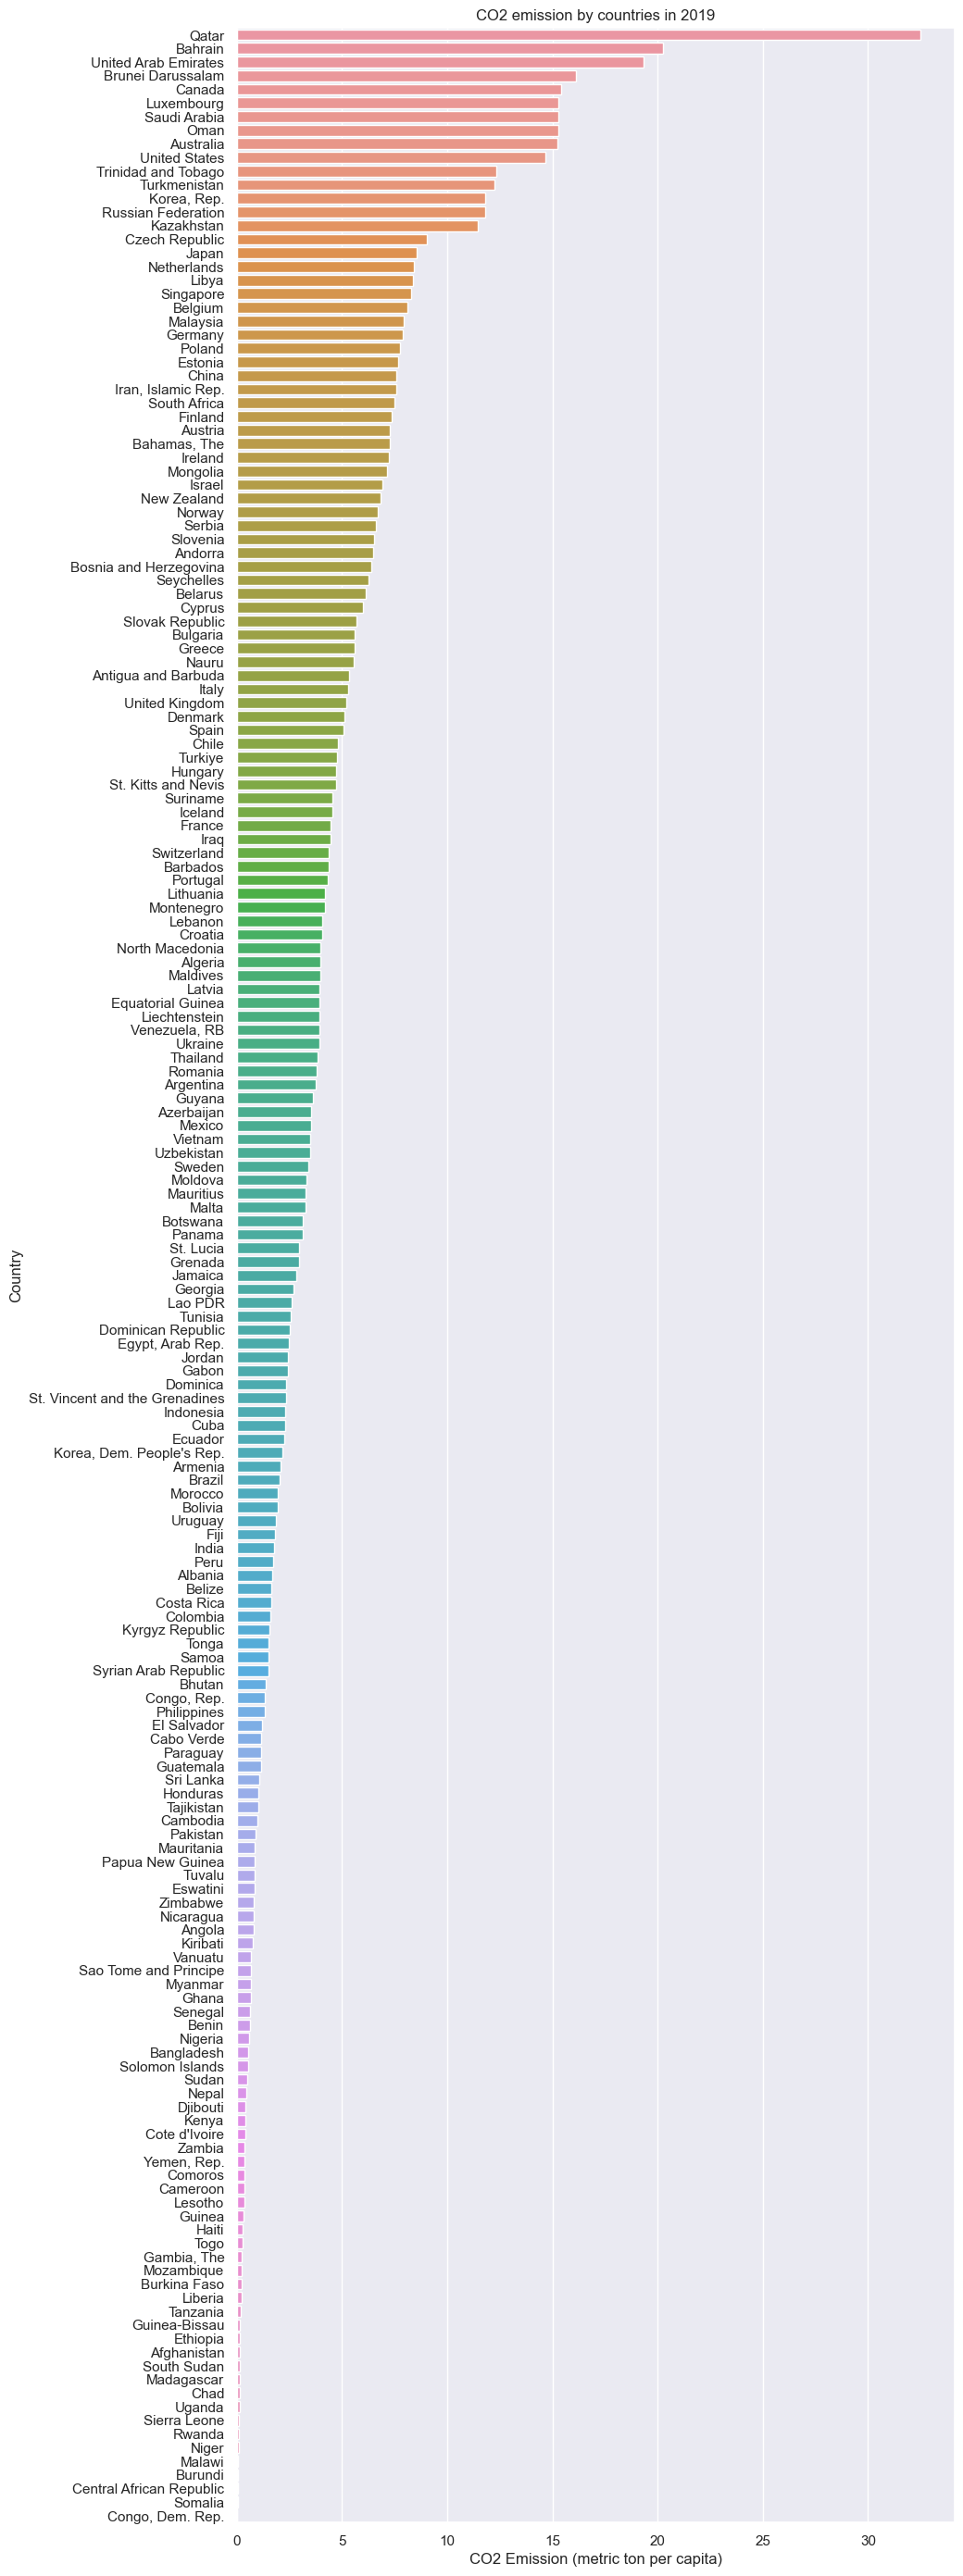

In [18]:
# lancer la figure matplotlib
sns.set_theme(style = 'darkgrid')
ax = plt.subplots(figsize=(10,35))
sns.set_color_codes('pastel')

# Tracer un graphique à l'aide de Seaborn pour les émissions de CO2 
sns.barplot(y = co2_emission.index,
            x = co2_emission['2019'])
plt.xlabel('CO2 Emission (metric ton per capita)')
plt.ylabel('Country')
plt.title("CO2 emission by countries in 2019");

# Visualisation des émissions de CO2 par habitant

# Examinons les 10 émissions moyennes de CO2 les plus élevées au fil du temps

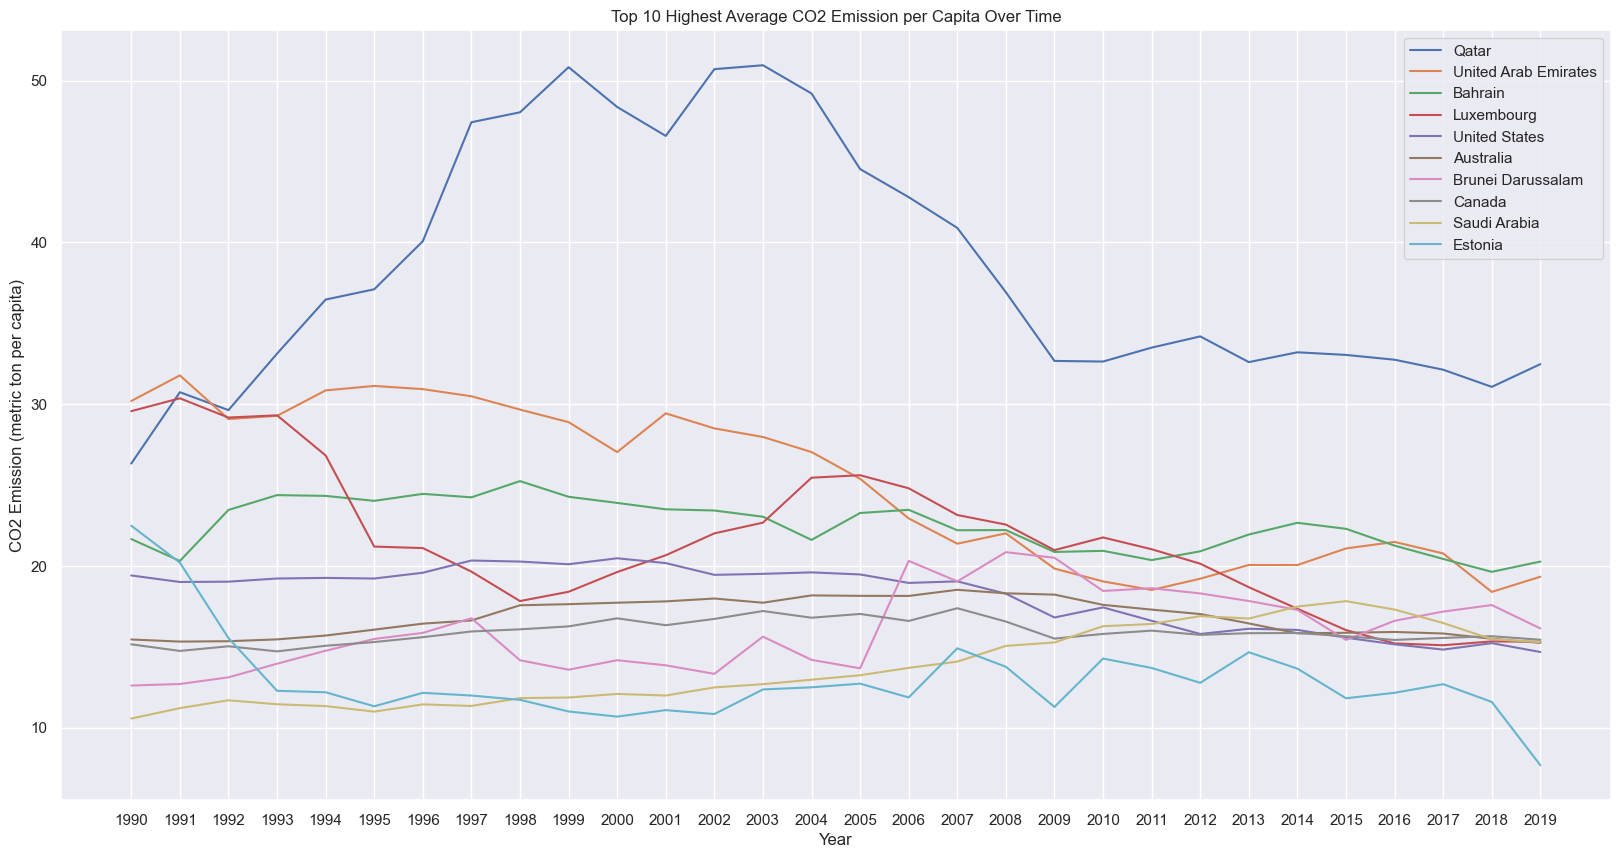

In [19]:
# Créer une nouvelle colonne avec la moyenne des émissions de CO2 de 1990 à 2019
co2_emission['avg'] = co2_emission.mean(axis = 1)

# Sélectionner les 20 émissions moyennes de CO2 les plus élevées
co2_avg = co2_emission.sort_values('avg', ascending = False).head(10)

# Suppression de la colonne 'avg'
co2_avg = co2_avg.drop('avg', axis = 'columns')

# Tracer le graphique linéaire de la série temporelle
fig, ax = plt.subplots(figsize =(20, 10))
n = 0
while n <10:
    sns.lineplot( x = co2_avg.columns, y = co2_avg.iloc[n], label = co2_avg.index[n])
    n = n + 1

plt.xlabel("Year")
plt.ylabel("CO2 Emission (metric ton per capita)")
plt.title("Top 10 Highest Average CO2 Emission per Capita Over Time");